# **Home Run Derby Capstone Project**

# **2023 Homerun Derby Dataset**
By Brian RM

In [ ]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/HomerunDerby.csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Name,Split,G,GS,PA,AB,R,H,2B,3B,...,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,sOPS+
0,Adley Rutschman,1st Half,86,82,383,326,44,89,13,0,...,138,7,0,0,2,5,1,0.300,98,121
1,Adley Rutschman,2nd Half,68,67,304,262,40,74,18,1,...,118,7,2,0,3,1,1,0.307,103,123
2,Adolis García,1st Half,90,88,393,348,69,91,20,0,...,180,7,3,0,6,0,3,0.292,103,130
3,Adolis García,2nd Half,58,57,239,207,39,45,9,0,...,102,5,3,0,0,0,1,0.254,95,118
4,Pete Alonso,1st Half,82,82,348,304,50,64,7,1,...,151,10,11,0,0,0,2,0.186,96,118
5,Pete Alonso,2nd Half,72,72,310,264,42,59,14,1,...,135,7,10,0,4,6,2,0.228,104,124
6,Randy Arozarena,1st Half,88,87,376,315,56,88,9,1,...,147,3,11,0,3,0,0,0.343,117,135
7,Randy Arozarena,2nd Half,63,62,278,236,39,52,10,2,...,87,7,7,0,2,1,5,0.269,78,91
8,Julio Rodríguez,1st Half,87,87,397,365,52,91,18,1,...,150,11,4,0,0,0,5,0.311,78,97
9,Julio Rodríguez,2nd Half,68,68,317,289,50,89,19,1,...,167,3,7,0,2,6,3,0.354,128,151


This dataset is a combination of 8 different datasets from Baseball Reference on the season stats of the 8 participants in the 2023 Homerun Derby divided into Pre and Post All-Star Game(Homerun Derby);

* Luis Robert Jr. (CHW)
* Adley Rutschman (BAL)
* Randy Arozarena	(TB)
* Adolis García (TEX)
* Mookie Betts (LAD)
* Vladimir Guerrero Jr. (TOR)
* Julio Rodríguez	(SEA)
* Pete Alonso (NYM)

# Exploratory Data Analysis

In [ ]:
df["HrPERab"] = df["AB"] / df["HR"]
df["HrPERab"].mean()

np.float64(19.892355169382487)

In [ ]:
df["HrPERab"].std()

7.429427512990016

In [ ]:
df["OPS"].mean()

np.float64(0.8369374999999999)

In [ ]:
df["OPS"].std()

0.08421517578995684

In [ ]:
df_FirstHalf = df[(df.Split == "1st Half")]
df_FirstHalf

,Name,Split,G,GS,PA,AB,R,H,2B,3B,...,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,sOPS+,HrPERab
0,Adley Rutschman,1st Half,86,82,383,326,44,89,13,0,...,7,0,0,2,5,1,0.300,98,121,27.166667
2,Adolis García,1st Half,90,88,393,348,69,91,20,0,...,7,3,0,6,0,3,0.292,103,130,15.130435
4,Pete Alonso,1st Half,82,82,348,304,50,64,7,1,...,10,11,0,0,0,2,0.186,96,118,11.692308
6,Randy Arozarena,1st Half,88,87,376,315,56,88,9,1,...,3,11,0,3,0,0,0.343,117,135,19.687500
8,Julio Rodríguez,1st Half,87,87,397,365,52,91,18,1,...,11,4,0,0,0,5,0.311,78,97,28.076923
10,Mookie Betts,1st Half,86,85,396,333,72,92,23,1,...,4,4,0,5,2,4,0.267,94,161,12.807692
12,Luis Robert Jr.,1st Half,89,87,375,339,62,92,23,0,...,7,9,0,1,4,1,0.319,110,142,13.038462
14,Vladimir Guerrero Jr.,1st Half,88,87,384,343,42,94,19,0,...,13,7,0,3,1,3,0.297,100,116,26.384615


In [ ]:
df_FirstHalf["OPS"]

,OPS
0,0.799
2,0.848
4,0.807
6,0.855
8,0.721
10,0.964
12,0.899
14,0.787


In [ ]:
df_FirstHalf["HrPERab"].mean()

np.float64(19.24807518115942)

In [ ]:
df_FirstHalf["OPS"].mean()

np.float64(0.835)

In [ ]:
df_SecondHalf = df[(df.Split == "2nd Half")]
df_SecondHalf

,Name,Split,G,GS,PA,AB,R,H,2B,3B,...,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,sOPS+,HrPERab
1,Adley Rutschman,2nd Half,68,67,304,262,40,74,18,1,...,7,2,0,3,1,1,0.307,103,123,32.750000
3,Adolis García,2nd Half,58,57,239,207,39,45,9,0,...,5,3,0,0,0,1,0.254,95,118,12.937500
5,Pete Alonso,2nd Half,72,72,310,264,42,59,14,1,...,7,10,0,4,6,2,0.228,104,124,13.200000
7,Randy Arozarena,2nd Half,63,62,278,236,39,52,10,2,...,7,7,0,2,1,5,0.269,78,91,33.714286
9,Julio Rodríguez,2nd Half,68,68,317,289,50,89,19,1,...,3,7,0,2,6,3,0.354,128,151,15.210526
11,Mookie Betts,2nd Half,66,66,297,251,54,87,17,0,...,1,4,0,0,1,0,0.378,108,176,19.307692
13,Luis Robert Jr.,2nd Half,56,54,220,207,28,52,13,1,...,3,3,0,1,1,1,0.305,84,110,17.250000
15,Vladimir Guerrero Jr.,2nd Half,68,67,298,259,36,65,11,0,...,10,2,0,1,4,3,0.251,100,114,19.923077


In [ ]:
df_SecondHalf["OPS"]

,OPS
1,0.822
3,0.815
5,0.837
7,0.700
9,0.941
11,1.018
13,0.788
15,0.790


In [ ]:
df_SecondHalf["HrPERab"].mean()

np.float64(20.536635157605552)

In [ ]:
df_SecondHalf["OPS"].mean()

np.float64(0.838875)

In [ ]:
df_FirstHalf["HrPERab"].mean() - df_SecondHalf["HrPERab"].mean()

np.float64(-1.2885599764461304)

In [ ]:
df.nsmallest( 15 , "HrPERab")

,Name,Split,G,GS,PA,AB,R,H,2B,3B,...,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,sOPS+,HrPERab
4,Pete Alonso,1st Half,82,82,348,304,50,64,7,1,...,10,11,0,0,0,2,0.186,96,118,11.692308
10,Mookie Betts,1st Half,86,85,396,333,72,92,23,1,...,4,4,0,5,2,4,0.267,94,161,12.807692
3,Adolis García,2nd Half,58,57,239,207,39,45,9,0,...,5,3,0,0,0,1,0.254,95,118,12.937500
12,Luis Robert Jr.,1st Half,89,87,375,339,62,92,23,0,...,7,9,0,1,4,1,0.319,110,142,13.038462
5,Pete Alonso,2nd Half,72,72,310,264,42,59,14,1,...,7,10,0,4,6,2,0.228,104,124,13.200000
2,Adolis García,1st Half,90,88,393,348,69,91,20,0,...,7,3,0,6,0,3,0.292,103,130,15.130435
9,Julio Rodríguez,2nd Half,68,68,317,289,50,89,19,1,...,3,7,0,2,6,3,0.354,128,151,15.210526
13,Luis Robert Jr.,2nd Half,56,54,220,207,28,52,13,1,...,3,3,0,1,1,1,0.305,84,110,17.250000
11,Mookie Betts,2nd Half,66,66,297,251,54,87,17,0,...,1,4,0,0,1,0,0.378,108,176,19.307692
6,Randy Arozarena,1st Half,88,87,376,315,56,88,9,1,...,3,11,0,3,0,0,0.343,117,135,19.687500


In [ ]:
df["OPS"].nlargest( 15 , "all")

,OPS
11,1.018
10,0.964
9,0.941
12,0.899
6,0.855
2,0.848
5,0.837
1,0.822
3,0.815
4,0.807


# Exploratory Data Visualization

<Axes: xlabel='BA', ylabel='Name'>

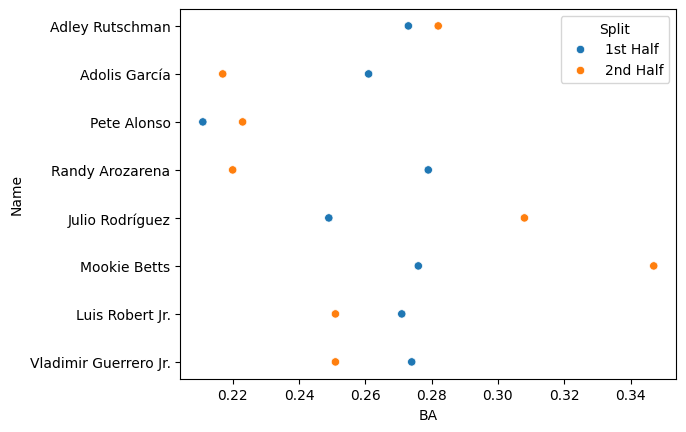

In [ ]:
sns.scatterplot(data = df, x = "BA", y = "Name", hue = "Split")

<Axes: xlabel='HrPERab', ylabel='Name'>

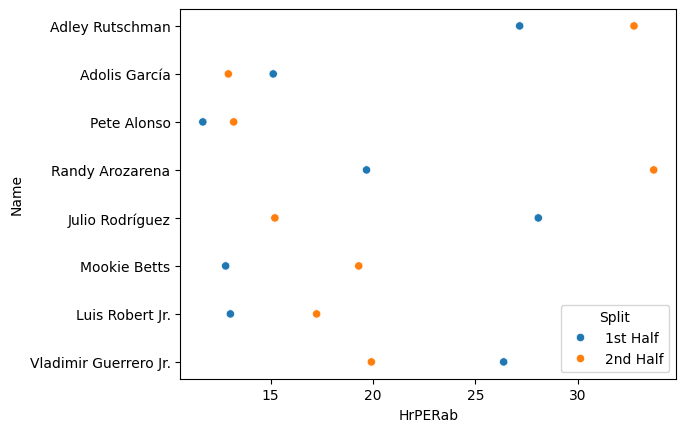

In [ ]:
sns.scatterplot(data = df, x = "HrPERab", y = "Name", hue = "Split")

<Axes: xlabel='SLG', ylabel='Name'>

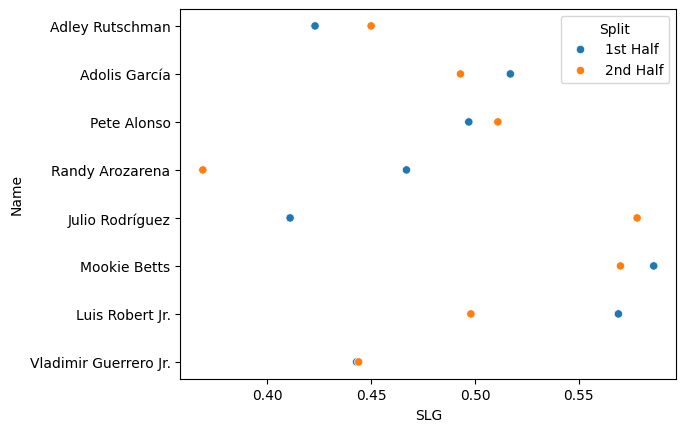

In [ ]:
sns.scatterplot(data = df, x = "SLG", y = "Name", hue = "Split")

<Axes: xlabel='OPS', ylabel='Name'>

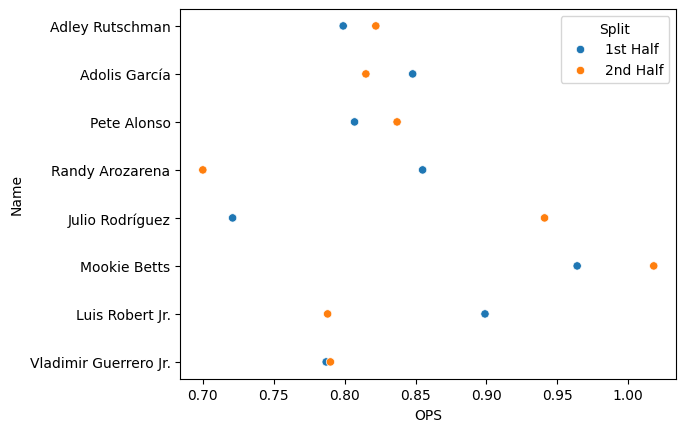

In [ ]:
sns.scatterplot(data = df, x = "OPS", y = "Name", hue = "Split")

<Axes: xlabel='OPS', ylabel='Frequency'>

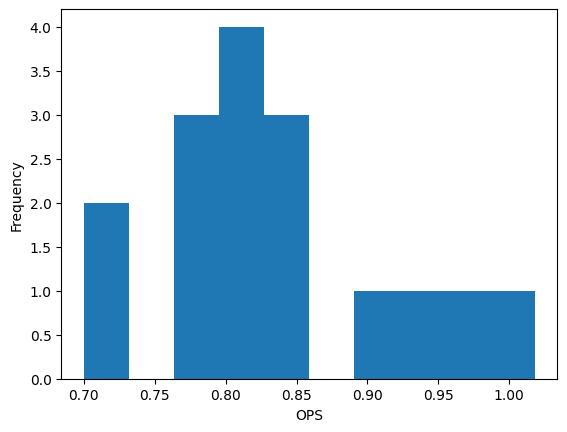

In [ ]:
df["OPS"].plot.hist( xlabel = "OPS")

<Axes: xlabel='AB', ylabel='H'>

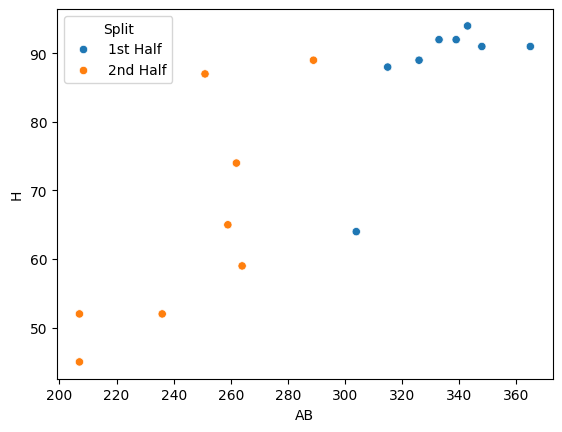

In [ ]:
sns.scatterplot(data = df, x = "AB", y = "H", hue = "Split")

<Axes: xlabel='AB', ylabel='OPS'>

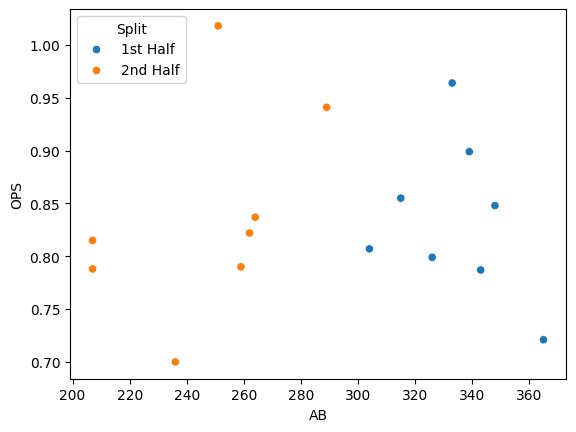

In [ ]:
sns.scatterplot(data = df, x = "AB", y = "OPS", hue = "Split")

# Data Science

In [ ]:
df.corr(numeric_only = True)["OPS"]

,OPS
G,0.066569
GS,0.082764
PA,0.120794
AB,0.069336
R,0.563734
H,0.439123
2B,0.474081
3B,-0.299669
HR,0.479141
RBI,0.399857


In [ ]:
before = df_FirstHalf["OPS"]
after = df_SecondHalf["OPS"]
ttest_ind(before, after, alternative = "greater")

TtestResult(statistic=np.float64(-0.0889308338763831), pvalue=np.float64(0.5348017303061205), df=np.float64(14.0))

# Conclusion

Since the pvalue is greater than the cutoff of 0.05, We fail to reject the initial hypothesis that participating in the home run derby leads to having a worse second half(slump) using the OPS. Meaning that there is no statistical significant evidence to suggest that participating in the Home Run Derby will lead to the player slumping in the second half in relation to their first half performance.